In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from scipy.integrate import solve_ivp
import scipy
deltaT = 0.1 # seconds
sim_time = 25 # seconds
T = np.arange(0, sim_time, deltaT)
Nsteps = len(T)

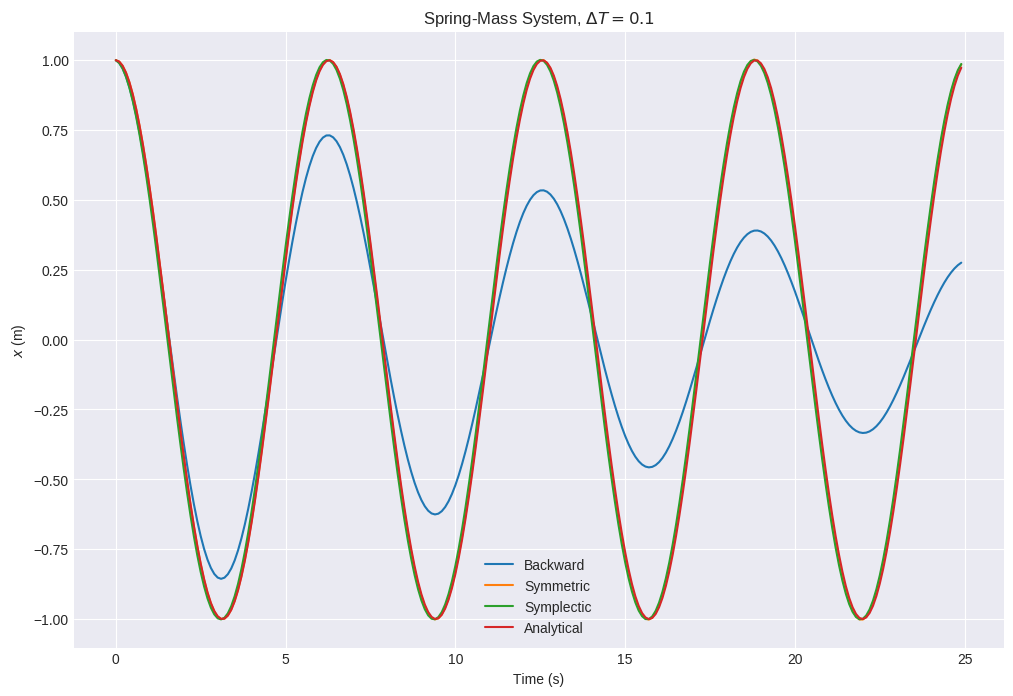

In [2]:
'''
Spring-Mass System
'''
x0 = np.array([1,0])
x = x0
X_fwd = np.empty((Nsteps,2))
A = np.array([[0, 1], [-1,0]]) # Without damper
# A = np.array([[0, 1], [-1,-1]]) # With damper
X_analytical = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_fwd[i,:] = x
    x = (np.eye(2) + A * deltaT) @ x 
    X_analytical[i,:] = scipy.linalg.expm(A * deltaT * i) @ x0

x = x0
X_bwd = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_bwd[i,:] = x
    x = np.linalg.inv(np.eye(2) - A * deltaT) @ x 

x = x0
X_mid = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_mid[i,:] = x
    xmid = x + A * deltaT/2 @ x
    x = x + deltaT * (A @ xmid)

x = x0
X_sym = np.empty((Nsteps,2))
Phi = np.array([[1-deltaT**2, deltaT], [-deltaT, 1]])
for i in range(Nsteps):
    X_sym[i,:] = x
    x = Phi @ x

plt.figure(figsize=(12,8))
# plt.plot(T, X_fwd[:,0], label = 'Forward')
plt.plot(T, X_bwd[:,0], label = 'Backward')
plt.plot(T, X_mid[:,0], label = 'Symmetric')
plt.plot(T, X_sym[:,0], label = 'Symplectic')
plt.plot(T, X_analytical[:,0], label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('$x$ (m)')
plt.title(f'Spring-Mass System, $\Delta T = {deltaT}$')
plt.legend()
plt.show()

0.6152757419635626
0.27031702539739944
0.01342747493849937
0.03534391158532453


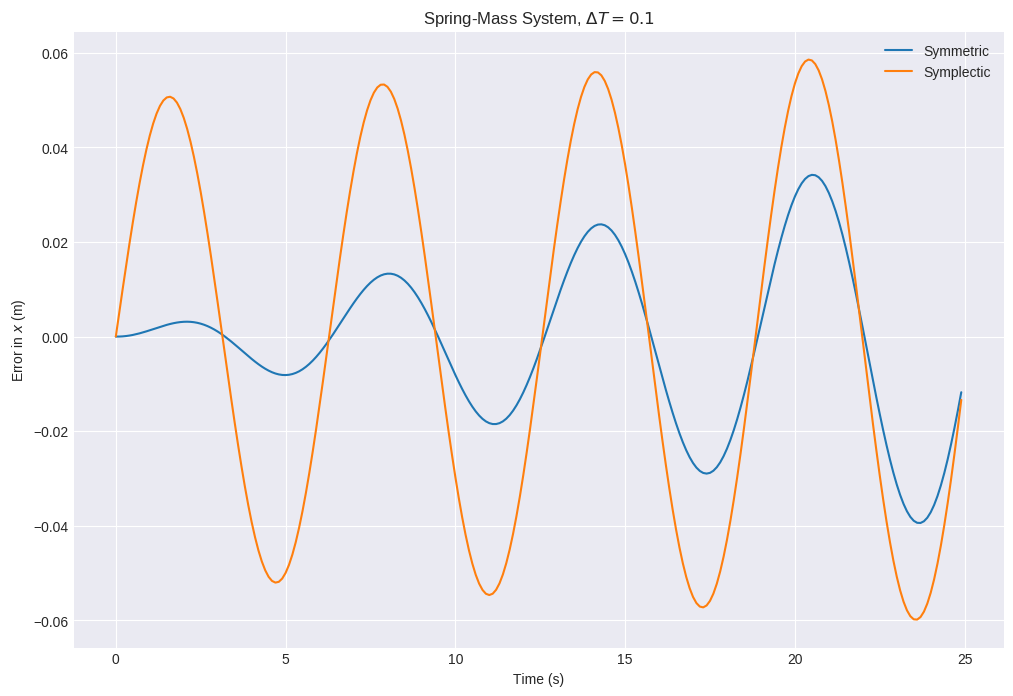

In [3]:
print(np.average(np.absolute(X_analytical[:,0] - X_fwd[:,0])))
print(np.average(np.absolute(X_analytical[:,0] - X_bwd[:,0])))
print(np.average(np.absolute(X_analytical[:,0] - X_mid[:,0])))
print(np.average(np.absolute(X_analytical[:,0] - X_sym[:,0])))
plt.figure(figsize=(12,8))
# plt.plot(T, X_analytical[:,0] - X_fwd[:,0], label='Forward')
# plt.plot(T, X_analytical[:,0] - X_bwd[:,0], label='Backward')
plt.plot(T, X_analytical[:,0] - X_mid[:,0], label='Symmetric')
plt.plot(T, X_analytical[:,0] - X_sym[:,0], label='Symplectic')
plt.xlabel('Time (s)')
plt.ylabel('Error in $x$ (m)')
plt.title(f'Spring-Mass System, $\Delta T = {deltaT}$')
plt.legend()
plt.show()

In [4]:
'''
Vertical Pendulum System
'''
from scipy.optimize import fsolve
def f(x):
    return np.array([x[1], -np.sin(x[0])])

def f1(x, *args):
    x1,x2 = x
    k = args[0]
    k1 = args[1]
    return (x1 - x2 * deltaT - k, x2 + np.sin(x1)*deltaT - k1)
def update_bwd(x):
    return fsolve(f1, x, args=(x))
# print(f1((0.5,0.5)))
x = np.array([0.5, 0.5])
print(update_bwd((x[0], x[1])))
print(f1(update_bwd((0.5,0.5)), 0, 0))

[0.54481738 0.44817381]
(0.5, 0.5)


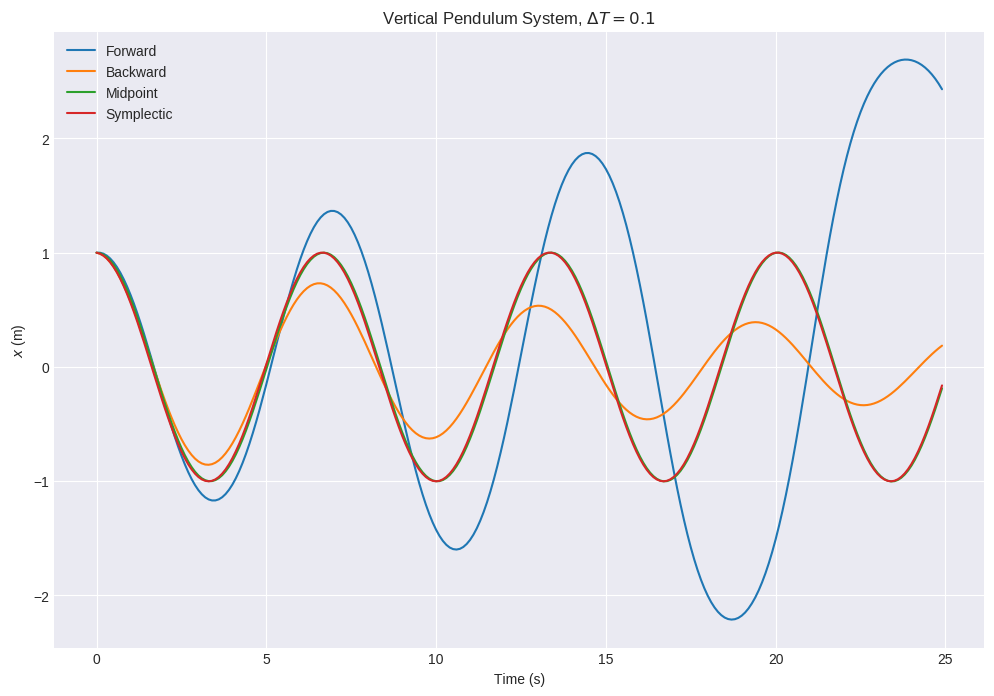

In [5]:
# x0 = np.array([0.5,0.5])
x0 = np.array([1.0,0])
x = x0
X_fwd = np.empty((Nsteps,2))
X_analytical = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_fwd[i,:] = x
    x += deltaT * f(x)
    x[0] = (x[0] + np.pi) % (2 * np.pi) - np.pi

x0 = np.array([0.5,0.5])
x0 = np.array([1.0,0])
x = x0
X_bwd = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_bwd[i,:] = x
    x = update_bwd((x[0], x[1]))

x0 = np.array([0.5,0.5])
x0 = np.array([1.0,0])
x = x0
X_mid = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_mid[i,:] = x
    xmid = x + deltaT/2 * f(x)
    x += deltaT * f(xmid)

x0 = np.array([0.5,0.5])
x0 = np.array([1.0,0])
x = x0
X_sym = np.empty((Nsteps,2))
for i in range(Nsteps):
    X_sym[i,:] = x
    x[1] = x[1] - deltaT * np.sin(x[0])
    x[0] += x[1] * deltaT

plt.figure(figsize=(12,8))
plt.plot(T, X_fwd[:,0], label = 'Forward')
plt.plot(T, X_bwd[:,0], label = 'Backward')
plt.plot(T, X_mid[:,0], label = 'Midpoint')
plt.plot(T, X_sym[:,0], label = 'Symplectic')
plt.xlabel('Time (s)')
plt.ylabel('$x$ (m)')
plt.title(f'Vertical Pendulum System, $\Delta T = {deltaT}$')
plt.legend()
plt.show()